In [2]:
from control.matlab import *
from scipy.linalg import eig
import numpy as np
import matplotlib.pyplot as plt
import control.step_info

Question 1a




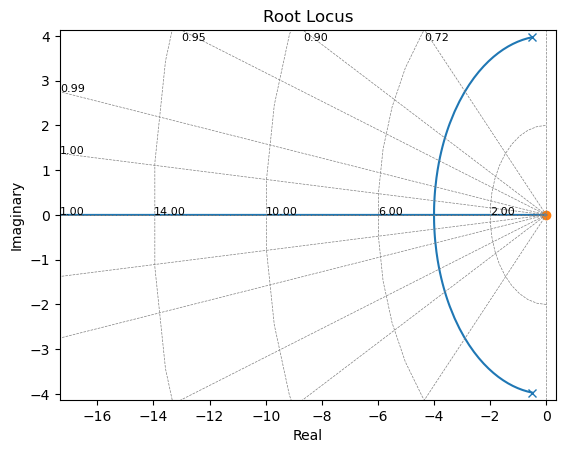

In [3]:
s = tf([1,0], [1])

H3 = s/(s*s + s + 16)
rlocus(H3)
plt.show()

#H3 is Stable

#H1 is type 1 as it starts at 90 degrees

lim jw/jw * H(jw)/(1+(H(jw))) = 3/4

1b

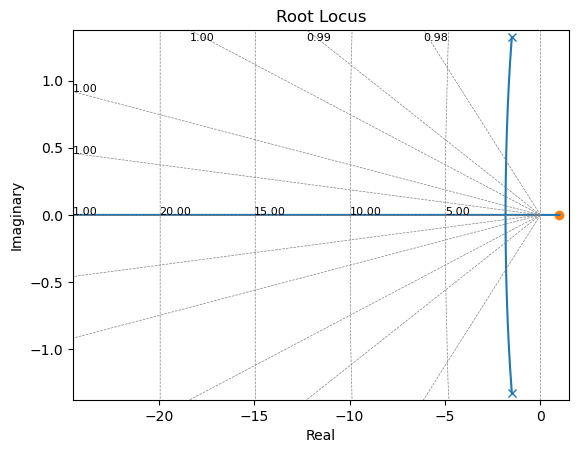

In [4]:
Hc = (2*s-2)/(s*s + 3*s + 4)
rlocus(Hc)
plt.show()


          s + 2
-------------------------
s^3 + 5 s^2 + 10.14 s + 2



C:\Users\kaspe\AppData\Local\Temp\ipykernel_21548\2913381694.py:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  j= np.complex(0,1)


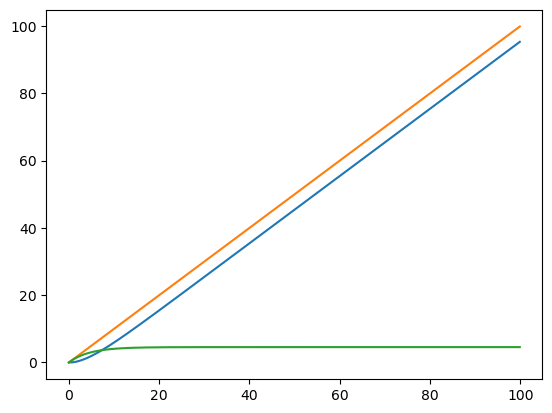

In [32]:
j= np.complex(0,1)
p1 = -2.5 + 1.7*j
p2 = -2.5 - 1.7*j
p3 = 0


Hb = zpk([-2], [p1, p2, p3], [1])
sys = Hb.feedback(1)
print(sys)

u = np.arange(0, 100, 0.1)
t = np.arange(0, 100, 0.1)

y1, t, x0 = lsim(sys, u, t)

plt.plot(t, y1)
plt.plot(t, u)
plt.plot(t, abs(y1-u))
plt.show()


In [13]:
z1 = 3 + 2j
z2 = 1 - 4j

# Addition
sum_result = z1 + z2
print(sum_result)  # Output: (4-2j)

# Multiplication
product_result = z1 * z2
print(product_result)  # Output: (11-10j)

# Real and imaginary parts
real_part = z1.real
imaginary_part = z1.imag
print(real_part)  # Output: 3.0
print(imaginary_part)  # Output: 2.0


(4-2j)
(11-10j)
3.0
2.0


2a


       s + 0.5
---------------------
s^4 + 0.4 s^3 + 4 s^2

Phase Margin = 36.94991451654485
Gain Margin = 3.6368717588954533
1.2551169959105468
40.92114744540649
resonance 24.10352332430673


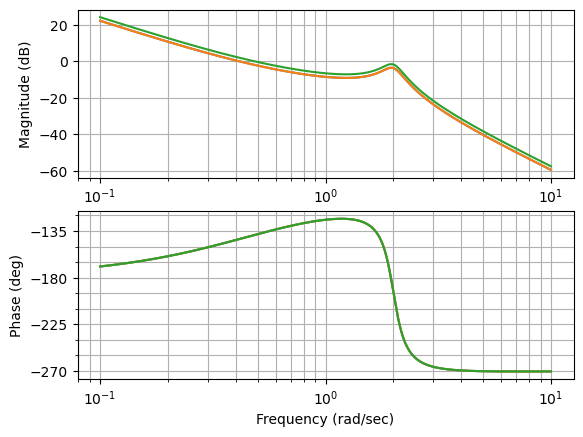

In [48]:
H = 0.5*(2*s + 1)/((s*s)*(s*s + 0.4*s + 4))

print(H)

bode(H)

mag, phase, omega = bode(H)


gm, pm, wp_180, wg_1 = margin(H)


print("Phase Margin =", pm)
print("Gain Margin =", 20*np.log10(gm))



In [58]:
%matplotlib qt

sisotool(H)

gain_pure = 1.073

print(gain_pure)

1.073


In [60]:
gmk, pmk, wp_180k, wg_1k = margin(gain_pure*H)

print("New Phase Margin =", pmk)

magk, phasek, omegak = bode((gain_pure*H).feedback(1))

print("Resonance Peak =", 20*np.log10(np.max(magk)))


New Phase Margin = 38.15028992823096
Resonance Peak = 7.594678037753431


In [61]:
#More Robust Way: 

# get to 3 dB gain margin, and back to gain again
K = 10.**((gmdB - 3)/20)
print("K", K)

2_b

In [63]:
m2 =1000
m1 = 10
k1 = 46000
k2 = 8000
b = 2400


A = np.matrix([[0.0, 1.0, 0.0, 0.0],
               [(-k2/m1) + (-k1/m1), -b/m1, k2/m1, b/m1],
               [0.0, 0.0, 0.0, 1.0],
               [k2/m2, b/m2, -k2/m2, -b/m2]])

B = np.matrix([[0.0], 
               [k1/m1], 
               [0], 
               [0]])

C = np.matrix([[0.0, 0.0, 1.0, 0.0],
               [k2/m2, b/m2, -k2/m2, -b/m2]])

D = np.matrix([[0.0], [0.0]])

sys = ss(A,B,C,D)
print(sys)

<LinearIOSystem>: sys[719]
Inputs (1): ['u[0]']
Outputs (2): ['y[0]', 'y[1]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ 0.0e+00  1.0e+00  0.0e+00  0.0e+00]
     [-5.4e+03 -2.4e+02  8.0e+02  2.4e+02]
     [ 0.0e+00  0.0e+00  0.0e+00  1.0e+00]
     [ 8.0e+00  2.4e+00 -8.0e+00 -2.4e+00]]

B = [[   0.]
     [4600.]
     [   0.]
     [   0.]]

C = [[ 0.   0.   1.   0. ]
     [ 8.   2.4 -8.  -2.4]]

D = [[0.]
     [0.]]



Question 3

In [76]:
K = 1
Kr = 0.86

H1 = K*s/s
H2 = 20/((s+1)*(s+4))
H3 = Kr*s/s
H4 = 1/s

inner_loop = (H1*H2).feedback(H3)

print(inner_loop)

Y_R = (inner_loop*H4).feedback(1)

print(Y_R.minreal())

print(Y_R.minreal().num[0])
print(Y_R.minreal().den[0])


        20 s^2
----------------------
s^4 + 5 s^3 + 21.2 s^2


            20 s^2
-------------------------------
s^5 + 5 s^4 + 21.2 s^3 + 20 s^2

[array([20.])]
[array([ 1. ,  5. , 21.2, 20. ])]


In [77]:
E_R = (s/s).feedback((inner_loop*H4))

print(E_R.minreal())
print(E_R.minreal().num[0])
print(E_R.minreal().den[0])


  s^3 + 5 s^2 + 21.2 s
-------------------------
s^3 + 5 s^2 + 21.2 s + 20

[array([ 1. ,  5. , 21.2,  0. ])]
[array([ 1. ,  5. , 21.2, 20. ])]


In [83]:
t = np.arange(0, 20, 0.1)

sys = Y_R.minreal()
print(sys)

y1, t = step(sys, t)
plt.plot(t, y1)
plt.show()

print(stepinfo(sys, t, SettlingTimeThreshold = 0.05))
f = y1[-1]

#print("Settling Time =", y1[np.logical_or(y1 > 1.05*f, y1<0.95*f)][-1])


           20
-------------------------
s^3 + 5 s^2 + 21.2 s + 20

{'RiseTime': 1.8000000000000003, 'SettlingTime': 2.7, 'SettlingMin': 0.9078999124522616, 'SettlingMax': 0.9999999999999989, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 0.9999999999500147, 'PeakTime': 19.900000000000002, 'SteadyStateValue': 0.9999999999999989}


In [74]:
H_ol = 20*(Kr + (1/s))/((s+1)*(s+4))

rlocus(H_ol)
plt.show()

gain = 0.3557

Clicked at    -0.7335  -0.02811j gain    0.08683 damp     0.9993


c:\Users\kaspe\anaconda3\lib\site-packages\control\rlocus.py:649: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  ax_rlocus.plot(s.real, s.imag, 'k.', marker='s', markersize=8,


Clicked at    -0.5742   +0.1124j gain    0.08534 damp     0.9814
Clicked at    -0.3394   +0.0656j gain    0.05844 damp     0.9818
Clicked at    -0.1129  -0.02811j gain    0.02163 damp     0.9704
Clicked at     -1.916    +8.124j gain      4.079 damp     0.2295
Clicked at     -1.916    +7.656j gain      3.649 damp     0.2428
Clicked at     -1.916    +6.766j gain      2.903 damp     0.2725
Clicked at     -1.916    +5.875j gain      2.249 damp     0.3101
Clicked at     -1.916    +5.407j gain      1.941 damp      0.334
Clicked at     -1.916     +4.61j gain      1.478 damp     0.3838
Clicked at     -1.916    +3.861j gain      1.109 damp     0.4446
Clicked at     -1.916    +3.111j gain     0.8059 damp     0.5244
Clicked at     -1.874    +2.361j gain     0.5686 damp     0.6217
Clicked at     -1.841    +1.799j gain     0.4344 damp     0.7151
Clicked at     -1.757    +1.237j gain     0.3382 damp     0.8177
Clicked at     -1.816    +1.472j gain     0.3741 damp     0.7769
Clicked at      -1.83    